In [891]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [892]:
notebook_path = os.path.abspath("HousingPriceAdvanced.ipynb")
path = os.path.join(os.path.dirname(notebook_path), "Input\\train.csv")
train = pd.read_csv(path)
path = os.path.join(os.path.dirname(notebook_path), "Input\\test.csv")
test = pd.read_csv(path)

In [893]:
pd.set_option('display.max_rows',100,'display.max_columns',100)

In [894]:
train.shape

(1460, 81)

In [895]:
test.shape

(1459, 80)

In [896]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [897]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [898]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [899]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

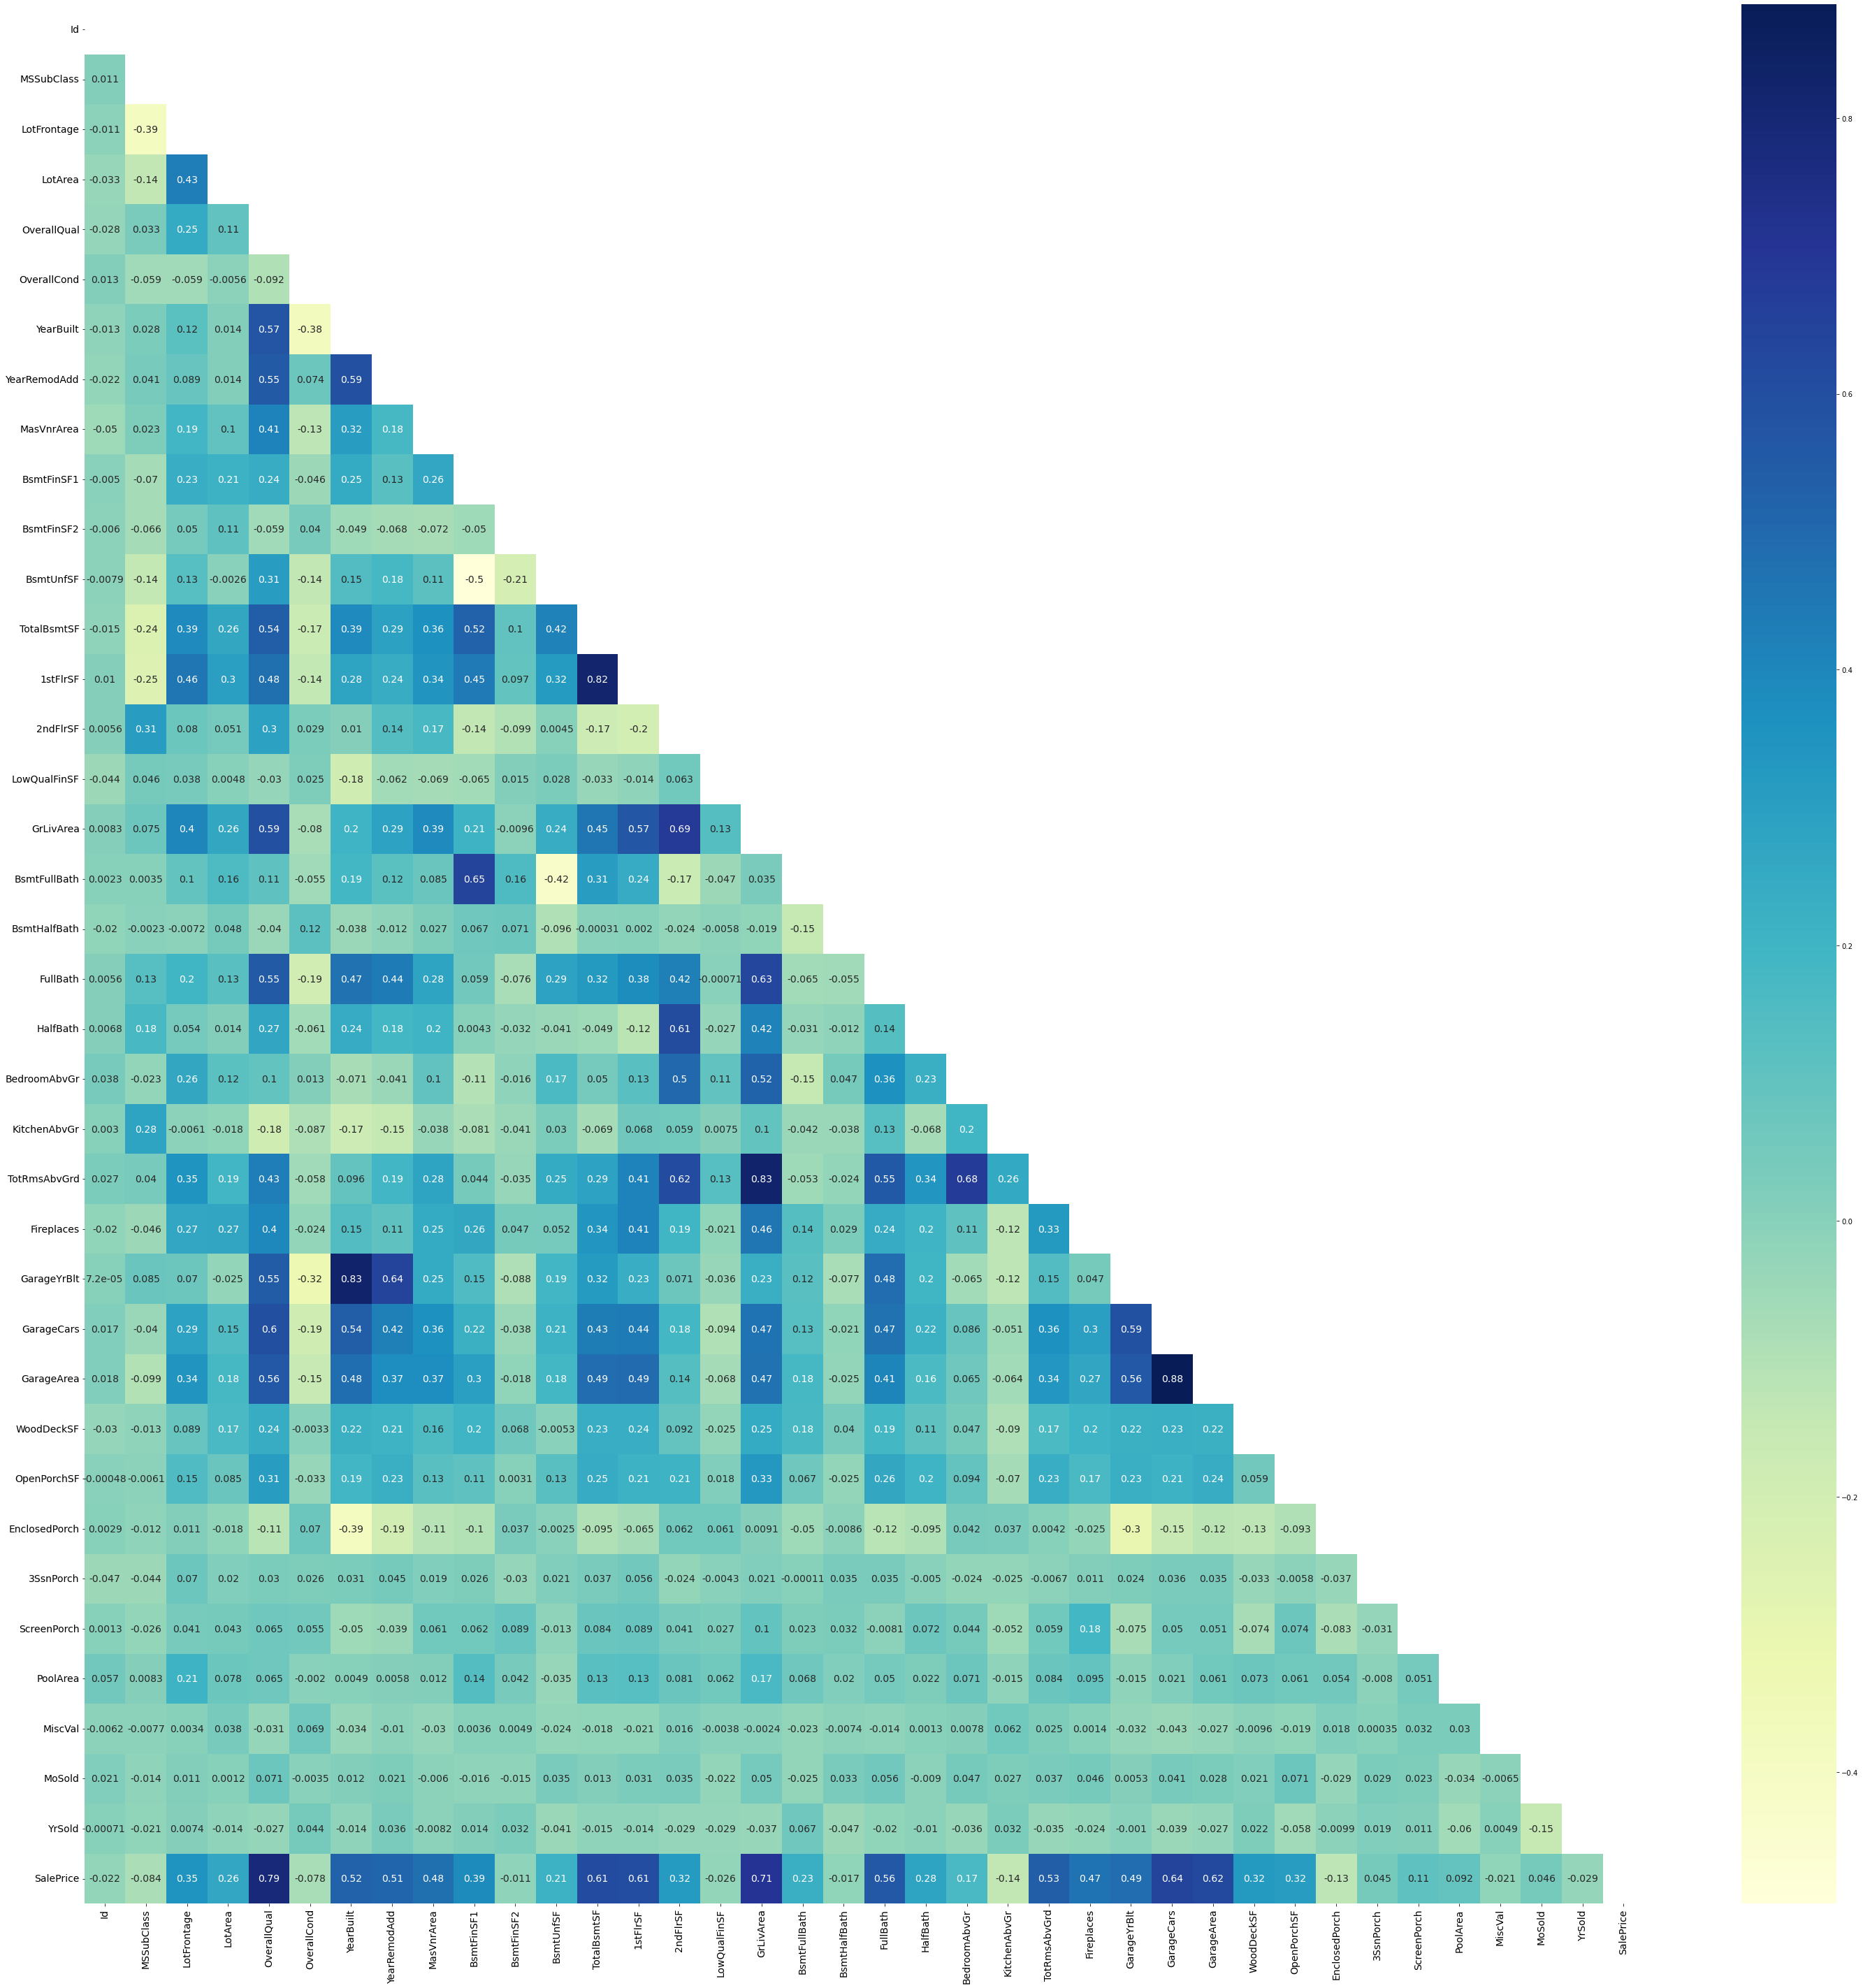

In [900]:
mask = np.zeros_like(train.corr())
triangle_indicies = np.triu_indices_from(mask)
mask[triangle_indicies] = True
plt.figure(figsize=(50,50))
sns.heatmap(train.corr(), mask=mask, annot=True, annot_kws={"size": 14}, cmap="YlGnBu")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [901]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [902]:
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [903]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [904]:
train['MSZoning'].fillna(train['MSZoning'].mode()[0],inplace=True)
test['MSZoning'].fillna(test['MSZoning'].mode()[0],inplace=True)

In [905]:
train['LotFrontage'].fillna(train['LotFrontage'].mean(),inplace=True)
test['LotFrontage'].fillna(test['LotFrontage'].mean(),inplace=True)

In [906]:
train['Alley'].fillna("None",inplace=True)
test['Alley'].fillna("None",inplace=True)

In [907]:
train['Utilities'].fillna(train['Utilities'].mode()[0],inplace=True)
test['Utilities'].fillna(test['Utilities'].mode()[0],inplace=True)

In [908]:
train['Exterior1st'].fillna(train['Exterior1st'].mode()[0],inplace=True)
test['Exterior1st'].fillna(test['Exterior1st'].mode()[0],inplace=True)

In [909]:
train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0],inplace=True)
test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0],inplace=True)

In [910]:
train['MasVnrType'].fillna(train['MasVnrType'].mode()[0],inplace=True)
test['MasVnrType'].fillna(test['MasVnrType'].mode()[0],inplace=True)

In [911]:
train['MasVnrArea'].fillna(0.0,inplace=True)
test['MasVnrArea'].fillna(0.0,inplace=True)

In [912]:
train['BsmtQual'].fillna('NA',inplace=True)
test['BsmtQual'].fillna('NA',inplace=True)

In [913]:
train['BsmtCond'].fillna('NA',inplace=True)
test['BsmtCond'].fillna('NA',inplace=True)

In [914]:
train['BsmtFinType1'].fillna('NA',inplace=True)
test['BsmtFinType1'].fillna('NA',inplace=True)

In [915]:
train['BsmtFinType2'].fillna('NA',inplace=True)
test['BsmtFinType2'].fillna('NA',inplace=True)

In [916]:
train['BsmtFinSF1'].fillna(0,inplace=True)
test['BsmtFinSF1'].fillna(0,inplace=True)

In [917]:
train['BsmtFinSF2'].fillna(0,inplace=True)
test['BsmtFinSF2'].fillna(0,inplace=True)

In [918]:
train['BsmtUnfSF'].fillna(0,inplace=True)
test['BsmtUnfSF'].fillna(0,inplace=True)

In [919]:
train['TotalBsmtSF'].fillna(0,inplace=True)
test['TotalBsmtSF'].fillna(0,inplace=True)

In [920]:
train['Electrical'].fillna(train['Electrical'].mode()[0],inplace=True)
test['Electrical'].fillna(test['Electrical'].mode()[0],inplace=True)

In [921]:
train['BsmtFullBath'].fillna(0,inplace=True)
test['BsmtFullBath'].fillna(0,inplace=True)

In [922]:
train['BsmtHalfBath'].fillna(0,inplace=True)
test['BsmtHalfBath'].fillna(0,inplace=True)

In [923]:
train['KitchenQual'].fillna(train['KitchenQual'].mode()[0], inplace=True)
test['KitchenQual'].fillna(test['KitchenQual'].mode()[0], inplace=True)

In [924]:
train['Functional'].fillna(train['Functional'].mode()[0],inplace=True)
test['Functional'].fillna(test['Functional'].mode()[0],inplace=True)

In [925]:
train['FireplaceQu'].fillna('NA',inplace=True)
test['FireplaceQu'].fillna('NA',inplace=True)

In [926]:
train['BsmtExposure'].fillna('NA',inplace=True)
test['BsmtExposure'].fillna('NA',inplace=True)

In [927]:
train['GarageType'].fillna('NA',inplace=True)
test['GarageType'].fillna('NA',inplace=True)

In [928]:
train['GarageYrBlt'].fillna(0,inplace=True)
test['GarageYrBlt'].fillna(0,inplace=True)

In [929]:
train['GarageFinish'].fillna('NA',inplace=True)
test['GarageFinish'].fillna('NA',inplace=True)

In [930]:
train['GarageCars'].fillna(0,inplace=True)
test['GarageCars'].fillna(0,inplace=True)

In [931]:
train['GarageArea'].fillna(0,inplace=True)
test['GarageArea'].fillna(0,inplace=True)

In [932]:
train['GarageQual'].fillna('NA',inplace=True)
test['GarageQual'].fillna('NA',inplace=True)

In [933]:
train['GarageCond'].fillna('NA',inplace=True)
test['GarageCond'].fillna('NA',inplace=True)

In [934]:
train['PoolQC'].fillna('NA',inplace=True)
test['PoolQC'].fillna('NA',inplace=True)

In [935]:
train['Fence'].fillna('NA',inplace=True)
test['Fence'].fillna('NA',inplace=True)

In [936]:
train['MiscFeature'].fillna('NA',inplace=True)
test['MiscFeature'].fillna('NA',inplace=True)

In [937]:
train['SaleType'].fillna(train['SaleType'].mode()[0],inplace=True)
test['SaleType'].fillna(train['SaleType'].mode()[0],inplace=True)

In [938]:
train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF   

In [939]:
test.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF   

In [940]:
le = LabelEncoder()

In [941]:
le.fit(train['MSZoning'])
train['MSZoning'] = le.transform(train['MSZoning'])
test['MSZoning'] = le.transform(test['MSZoning'])

In [942]:
le.fit(train['Street'])
train['Street'] = le.transform(train['Street'])
test['Street'] = le.transform(test['Street'])

In [943]:
le.fit(train['Alley'])
train['Alley'] = le.transform(train['Alley'])
test['Alley'] = le.transform(test['Alley'])

In [944]:
le.fit(train['LotShape'])
train['LotShape'] = le.transform(train['LotShape'])
test['LotShape'] = le.transform(test['LotShape'])

In [945]:
le.fit(train['LandContour'])
train['LandContour'] = le.transform(train['LandContour'])
test['LandContour'] = le.transform(test['LandContour'])

In [946]:
le.fit(train['Utilities'])
train['Utilities'] = le.transform(train['Utilities'])
test['Utilities'] = le.transform(test['Utilities'])

In [947]:
le.fit(train['LotConfig'])
train['LotConfig'] = le.transform(train['LotConfig'])
test['LotConfig'] = le.transform(test['LotConfig'])

In [948]:
le.fit(train['LandSlope'])
train['LandSlope'] = le.transform(train['LandSlope'])
test['LandSlope'] = le.transform(test['LandSlope'])

In [949]:
le.fit(train['Neighborhood'])
train['Neighborhood'] = le.transform(train['Neighborhood'])
test['Neighborhood'] = le.transform(test['Neighborhood'])

In [950]:
le.fit(train['Condition1'])
train['Condition1'] = le.transform(train['Condition1'])
test['Condition1'] = le.transform(test['Condition1'])

In [951]:
le.fit(train['Condition2'])
train['Condition2'] = le.transform(train['Condition2'])
test['Condition2'] = le.transform(test['Condition2'])

In [952]:
le.fit(train['BldgType'])
train['BldgType'] = le.transform(train['BldgType'])
test['BldgType'] = le.transform(test['BldgType'])

In [953]:
le.fit(train['HouseStyle'])
train['HouseStyle'] = le.transform(train['HouseStyle'])
test['HouseStyle'] = le.transform(test['HouseStyle'])

In [954]:
le.fit(train['OverallQual'])
train['OverallQual'] = le.transform(train['OverallQual'])
test['OverallQual'] = le.transform(test['OverallQual'])

In [955]:
le.fit(train['OverallCond'])
train['OverallCond'] = le.transform(train['OverallCond'])
test['OverallCond'] = le.transform(test['OverallCond'])

In [956]:
le.fit(train['RoofStyle'])
train['RoofStyle'] = le.transform(train['RoofStyle'])
test['RoofStyle'] = le.transform(test['RoofStyle'])

In [957]:
le.fit(train['RoofMatl'])
train['RoofMatl'] = le.transform(train['RoofMatl'])
test['RoofMatl'] = le.transform(test['RoofMatl'])

In [958]:
le.fit(train['Exterior1st'])
train['Exterior1st'] = le.transform(train['Exterior1st'])
test['Exterior1st'] = le.transform(test['Exterior1st'])

In [959]:
le.fit(train['Exterior2nd'])
train['Exterior2nd'] = le.transform(train['Exterior2nd'])
test['Exterior2nd'] = le.transform(test['Exterior2nd'])

In [960]:
le.fit(train['MasVnrType'])
train['MasVnrType'] = le.transform(train['MasVnrType'])
test['MasVnrType'] = le.transform(test['MasVnrType'])

In [961]:
le.fit(train['ExterQual'])
train['ExterQual'] = le.transform(train['ExterQual'])
test['ExterQual'] = le.transform(test['ExterQual'])

In [962]:
le.fit(train['ExterCond'])
train['ExterCond'] = le.transform(train['ExterCond'])
test['ExterCond'] = le.transform(test['ExterCond'])

In [963]:
le.fit(train['Foundation'])
train['Foundation'] = le.transform(train['Foundation'])
test['Foundation'] = le.transform(test['Foundation'])

In [964]:
le.fit(train['BsmtQual'])
train['BsmtQual'] = le.transform(train['BsmtQual'])
test['BsmtQual'] = le.transform(test['BsmtQual'])

In [965]:
le.fit(train['BsmtCond'])
train['BsmtCond'] = le.transform(train['BsmtCond'])
test['BsmtCond'] = le.transform(test['BsmtCond'])

In [966]:
le.fit(train['BsmtExposure'])
train['BsmtExposure'] = le.transform(train['BsmtExposure'])
test['BsmtExposure'] = le.transform(test['BsmtExposure'])

In [967]:
le.fit(train['BsmtFinType1'])
train['BsmtFinType1'] = le.transform(train['BsmtFinType1'])
test['BsmtFinType1'] = le.transform(test['BsmtFinType1'])

In [968]:
le.fit(train['BsmtFinType2'])
train['BsmtFinType2'] = le.transform(train['BsmtFinType2'])
test['BsmtFinType2'] = le.transform(test['BsmtFinType2'])

In [969]:
le.fit(train['Heating'])
train['Heating'] = le.transform(train['Heating'])
test['Heating'] = le.transform(test['Heating'])

In [970]:
le.fit(train['HeatingQC'])
train['HeatingQC'] = le.transform(train['HeatingQC'])
test['HeatingQC'] = le.transform(test['HeatingQC'])

In [971]:
le.fit(train['CentralAir'])
train['CentralAir'] = le.transform(train['CentralAir'])
test['CentralAir'] = le.transform(test['CentralAir'])

In [972]:
le.fit(train['Electrical'])
train['Electrical'] = le.transform(train['Electrical'])
test['Electrical'] = le.transform(test['Electrical'])

In [973]:
le.fit(train['KitchenQual'])
train['KitchenQual'] = le.transform(train['KitchenQual'])
test['KitchenQual'] = le.transform(test['KitchenQual'])

In [974]:
le.fit(train['Functional'])
train['Functional'] = le.transform(train['Functional'])
test['Functional'] = le.transform(test['Functional'])

In [975]:
le.fit(train['FireplaceQu'])
train['FireplaceQu'] = le.transform(train['FireplaceQu'])
test['FireplaceQu'] = le.transform(test['FireplaceQu'])

In [976]:
le.fit(train['GarageType'])
train['GarageType'] = le.transform(train['GarageType'])
test['GarageType'] = le.transform(test['GarageType'])

In [977]:
le.fit(train['GarageFinish'])
train['GarageFinish'] = le.transform(train['GarageFinish'])
test['GarageFinish'] = le.transform(test['GarageFinish'])

In [978]:
le.fit(train['GarageQual'])
train['GarageQual'] = le.transform(train['GarageQual'])
test['GarageQual'] = le.transform(test['GarageQual'])

In [979]:
le.fit(train['GarageCond'])
train['GarageCond'] = le.transform(train['GarageCond'])
test['GarageCond'] = le.transform(test['GarageCond'])

In [980]:
le.fit(train['PavedDrive'])
train['PavedDrive'] = le.transform(train['PavedDrive'])
test['PavedDrive'] = le.transform(test['PavedDrive'])

In [981]:
le.fit(train['PoolQC'])
train['PoolQC'] = le.transform(train['PoolQC'])
test['PoolQC'] = le.transform(test['PoolQC'])

In [982]:
le.fit(train['Fence'])
train['Fence'] = le.transform(train['Fence'])
test['Fence'] = le.transform(test['Fence'])

In [983]:
le.fit(train['MiscFeature'])
train['MiscFeature'] = le.transform(train['MiscFeature'])
test['MiscFeature'] = le.transform(test['MiscFeature'])

In [984]:
le.fit(train['MoSold'])
train['MoSold'] = le.transform(train['MoSold'])
test['MoSold'] = le.transform(test['MoSold'])

In [985]:
le.fit(train['SaleType'])
train['SaleType'] = le.transform(train['SaleType'])
test['SaleType'] = le.transform(test['SaleType'])

In [986]:
le.fit(train['SaleCondition'])
train['SaleCondition'] = le.transform(train['SaleCondition'])
test['SaleCondition'] = le.transform(test['SaleCondition'])

In [987]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   Alley          1460 non-null   int32  
 7   LotShape       1460 non-null   int32  
 8   LandContour    1460 non-null   int32  
 9   Utilities      1460 non-null   int32  
 10  LotConfig      1460 non-null   int32  
 11  LandSlope      1460 non-null   int32  
 12  Neighborhood   1460 non-null   int32  
 13  Condition1     1460 non-null   int32  
 14  Condition2     1460 non-null   int32  
 15  BldgType       1460 non-null   int32  
 16  HouseStyle     1460 non-null   int32  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [988]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int32  
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int32  
 6   Alley          1459 non-null   int32  
 7   LotShape       1459 non-null   int32  
 8   LandContour    1459 non-null   int32  
 9   Utilities      1459 non-null   int32  
 10  LotConfig      1459 non-null   int32  
 11  LandSlope      1459 non-null   int32  
 12  Neighborhood   1459 non-null   int32  
 13  Condition1     1459 non-null   int32  
 14  Condition2     1459 non-null   int32  
 15  BldgType       1459 non-null   int32  
 16  HouseStyle     1459 non-null   int32  
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [989]:
x = train.drop('SalePrice',axis=1)
y = train['SalePrice']

In [990]:
x

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,6,4,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,4,2,706,6,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,3,4,1,0,1,2008,8,4
1,2,20,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,5,7,1976,1976,1,1,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,3,4,1,0,4,2007,8,4
2,3,60,3,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,6,4,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,3,4,1,0,8,2008,8,4
3,4,70,3,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5,6,4,1915,1970,1,1,13,15,2,0.0,3,4,0,4,1,4,0,216,6,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,3,4,1,0,1,2006,8,0
4,5,60,3,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5,7,4,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,3,4,1,0,11,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,1,3,3,0,4,0,8,2,2,0,5,5,4,1999,2000,1,1,12,13,2,0.0,3,4,2,2,4,4,6,0,6,0,953,953,1,0,1,4,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,5,1,1999.0,2,2,460,5,5,2,0,40,0,0,0,0,3,4,1,0,7,2007,8,4
1456,1457,20,3,85.0,13175,1,1,3,3,0,4,0,14,2,2,0,2,5,5,1978,1988,1,1,9,10,3,119.0,3,4,1,2,4,4,0,790,5,163,589,1542,1,4,1,4,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,5,1,1978.0,3,2,500,5,5,2,349,0,0,0,0,0,3,2,1,0,1,2010,8,4
1457,1458,70,3,66.0,9042,1,1,3,3,0,4,0,6,2,2,0,5,6,8,1941,2006,1,1,5,5,2,0.0,0,2,4,4,1,4,2,275,6,0,877,1152,1,0,1,4,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,2,1,1941.0,2,1,252,5,5,2,0,60,0,0,0,0,3,0,3,2500,4,2010,8,4
1458,1459,20,3,68.0,9717,1,1,3,3,0,4,0,12,2,2,0,2,4,5,1950,1996,3,1,8,8,2,0.0,3,4,1,4,4,2,2,49,5,1029,0,1078,1,2,1,0,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,3,1,1950.0,3,1,240,5,5,2,366,0,112,0,0,0,3,4,1,0,3,2010,8,4


In [991]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [992]:
Id = test['Id']
x.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

In [993]:
xg = XGBClassifier(eval_metric='mlogloss')

In [994]:
xg.fit(x,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [995]:
xg.score(x,y)

0.9260273972602739

In [996]:
prediction = xg.predict(test)

In [997]:
prediction

array([115000, 157000, 181000, ..., 168000,  93500, 275000], dtype=int64)

In [998]:
ans = pd.DataFrame()
ans['Id'] = Id
ans['SalePrice'] = prediction
ans

,Id,SalePrice
0,1461,115000
1,1462,157000
2,1463,181000
3,1464,173000
4,1465,179200
...,...,...
1454,2915,97000
1455,2916,88000
1456,2917,168000
1457,2918,93500


In [999]:
ans.to_csv('submission.csv', encoding='utf-8', index=False)